<div style="text-align: center">
<h1>INFO 6105 Data Sci Engineering Methods and Tools</h1>
</div>
<div style="text-align: center">
<h2>FINAL PROJECT</h2>
</div>
<div style="text-align: center">
<h3>Scraping Updated Coronavirus Data from WORLDOMETER</h3>
    <h3>Sentiment Analysis</h3>
</div>
<div style="text-align: center">
<a href= "https://www.worldometers.info/coronavirus/">
</a>
</div>


In [7]:
from bs4 import BeautifulSoup
import  requests
import numpy as np
import pandas as pd

In [4]:
url = 'https://www.worldometers.info/coronavirus/'

In [5]:
source = requests.get(url)
soup = BeautifulSoup(source.text, 'html.parser')
title = soup.find('title')

In [6]:
print(title)

<title>Coronavirus Update (Live): 1,266,614 Cases and 69,169 Deaths from COVID-19 Virus Outbreak - Worldometer</title>


In [28]:
div = soup.find_all(id = 'maincounter-wrap')
print(div[0].find('h1').get_text() , div[0].find('span').get_text())
print(div[1].find('h1').get_text() , div[1].find('span').get_text())
print(div[2].find('h1').get_text() , div[2].find('span').get_text())

Coronavirus Cases: 1,266,614 
Deaths: 69,169
Recovered: 260,967


In [162]:
table = soup.find_all(id = 'main_table_countries_today')
columns = table[0].find('tr').get_text()
columns = columns.replace('/', '')
columns = columns.replace(',', '')
columns = columns.replace('', '')
res1 = (columns.rstrip().split('\n')) 
res1.pop(13)
res1.pop(0)
# Printing result 
print(str(res1))

['CountryOther', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'ActiveCases', 'SeriousCritical', 'Tot\xa0Cases1M pop', 'Deaths1M pop', 'TotalTests', 'Tests']


In [188]:
table1 = soup.find_all(id = 'main_table_countries_today')
a = table[0].find('tbody')
b = a.find_all('tr')
c = b[1].get_text()
res2 = (c.rstrip().split('\n'))  
res2.pop(0)
# Printing result 
print(str(res2)) 
row = [res2]



['USA', '333,017', '+21,660', '9,528 ', '+1,076', '17,018', '306,471', '8,623', '1,006', '29', '1,751,296', '5,291']
<class 'list'>


In [177]:
# df = pd.DataFrame(res2, columns = ['','Country,Other','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','ActiveCases','Serious','Critical','Tot\xa0Cases/1M pop','Deaths/1M pop','TotalTests','Tests','1M pop'])
df = pd.DataFrame(row, columns = ['CountryOther', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'ActiveCases', 'SeriousCritical', 'TotalCases1Mpop', 'Deaths1Mpop', 'TotalTests', 'Tests'])
df

,CountryOther,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalCases1Mpop,Deaths1Mpop,TotalTests,Tests
0,USA,"333,017","+21,660","9,528","+1,076","17,018","306,471","8,623","1,006",29,"1,751,296","5,291"


In [192]:
table1 = soup.find_all(id = 'main_table_countries_today')
a = table[0].find('tbody')
b = a.find_all('tr')
row=[]
for i in range(0,len(b)):
    c= b[i].get_text()
    res2 = (c.rstrip().split('\n'))  
    res2.pop(0)
    row.append(res2)
print(row)
    
    

[['World', '1,266,614', '+65,161', '69,169', '+4,481', '260,967', '936,478', '45,530', '162', '8.9'], ['USA', '333,017', '+21,660', '9,528 ', '+1,076', '17,018', '306,471', '8,623', '1,006', '29', '1,751,296', '5,291'], ['Spain', '130,854', '+4,686', '12,518 ', '+571', '38,080', '80,256', '6,861', '2,799', '268', '355,000', '7,593'], ['Italy', '128,948', '+4,316', '15,887 ', '+525', '21,815', '91,246', '3,977', '2,133', '263', '691,461', '11,436'], ['Germany', '100,024', '+3,932', '1,576 ', '+132', '28,700', '69,748', '3,936', '1,194', '19', '918,460', '10,962'], ['France', '92,839', '+2,886', '8,078 ', '+518', '16,183', '68,578', '6,838', '1,422', '124', '224,254', '3,436'], ['Iran', '58,226', '+2,483', '3,603 ', '+151', '19,736', '34,887', '4,103', '693', '43', '186,000', '2,214'], ['UK', '47,806', '+5,903', '4,934 ', '+621', '135', '42,737', '1,559', '704', '73', '195,524', '2,880'], ['Turkey', '27,069', '+3,135', '574 ', '+73', '1,042', '25,453', '1,381', '321', '7', '181,445', '2,

In [193]:
df = pd.DataFrame(row, columns = ['CountryOther', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'ActiveCases', 'SeriousCritical', 'TotalCases1Mpop', 'Deaths1Mpop', 'TotalTests', 'Tests'])
df

,CountryOther,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalCases1Mpop,Deaths1Mpop,TotalTests,Tests
0,World,"1,266,614","+65,161","69,169","+4,481","260,967","936,478","45,530",162,8.9,None,None
1,USA,"333,017","+21,660","9,528","+1,076","17,018","306,471","8,623","1,006",29,"1,751,296","5,291"
2,Spain,"130,854","+4,686","12,518",+571,"38,080","80,256","6,861","2,799",268,"355,000","7,593"
3,Italy,"128,948","+4,316","15,887",+525,"21,815","91,246","3,977","2,133",263,"691,461","11,436"
4,Germany,"100,024","+3,932","1,576",+132,"28,700","69,748","3,936","1,194",19,"918,460","10,962"
...,...,...,...,...,...,...,...,...,...,...,...,...
206,Papua New Guinea,1,,,,,1,,0.1,,72,8
207,Saint Pierre Miquelon,1,+1,,,,1,,173,None,None,None
208,South Sudan,1,+1,,,,1,,0.09,None,None,None
209,Timor-Leste,1,,,,,1,,0.8,None,None,None


In [51]:

import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt

RT @BruceDawson0xB: My daughter lives in Canada and applied for the COVID-19 benefit on Tuesday. It took two minutes to apply. The first pa…
Hire as many men as required to get the job done in the few days, so many abled  Ugandans will give anything for a… https://t.co/vpdOXfjMXq
RT @BruceDawson0xB: My daughter lives in Canada and applied for the COVID-19 benefit on Tuesday. It took two minutes to apply. The first pa…
RT @BruceDawson0xB: My daughter lives in Canada and applied for the COVID-19 benefit on Tuesday. It took two minutes to apply. The first pa…
People do not develop immunities to the flu.  Why is it assumed people will develop an immunity to COVID-19 after r… https://t.co/mmfWqTLo6Y
RT @BruceDawson0xB: My daughter lives in Canada and applied for the COVID-19 benefit on Tuesday. It took two minutes to apply. The first pa…
RT @pressfreedom: Iraq's media regulator suspended Reuters’ license for three months on April 2 for a report about the number of confirmed…
RT @Jim_Brunner

@politico Can’t wait to see the size of the settlement when a person certified immune gets covid-19
RT @fisayosoyombo: Hi @NCDCgov NCDC, there’s a case of POSSIBLE COVID-19 death in Kubwa, Abuja, that you need to look into. 

A concerned n…
RT @jammo2002uk: World Health Organisation refuses to
 name staff who blocked early
 COVID-19 travel bans
Sky News Australia
https://t.co/6…
RT @HFWOdisha: #Odisha Govt. is taking steps to increase #COVID19 testing capacity. MKCG MCH, Berhampur has been permitted by ICMR to condu…
RT @LeaveEUOfficial: No surprise that the Fake News Party is down -29% in the polls after its handling of the COVID-19 crisis, as public su…
RT @tricia_starks: 'We just can’t feed this many': 10,000 seek S.A. Food Bank help as COVID-19 ravages economy https://t.co/v35IpvIPLo via…
RT @dailybugle1898: STEVE Hedley, Assistant Chief of the RMT, said he'd "throw a party” if Boris Johnson died of Covid-19. The trade union…
RT @GregHilburn1: Story: Louisiana COVID-19 deaths at 75

RT @AdamMilstein: We need to unite to defeat the coronavirus. #NancyPelosi comparing @realDonaldTrump to Nero fiddling while Rome burned an…
RT @FOX4: Dallas County reports 105 new COVID-19 cases, 3 more deaths on Friday https://t.co/zazIiVELoD
RT @Jim_Brunner: NEW: @RepJayapal is proposing a 'Paycheck Guarantee Act' which would have feds cover 100% of worker salaries up to $100k f…
RT @NickCastele: April 10 Ohio COVID-19 numbers: 5878 confirmed cases, 1755 hospitalizations, 497 hospitalizations, 231 deaths. https://t.c…
RT @Chandler_Rome: Alex Bregman has launched FEEDHOU, a $1 million fundraising campaign to help feed Houston-area residents during the COVI…
With everything that's going on around, we need humanity and generosity more than ever.

Here is Mr.Kirit Joshi (Sp… https://t.co/iHMMAYZvvY
RT @KochIndustries: As the world continues to respond to the COVID-19 pandemic, we’re partnering with @VioletDefense to develop a solution…
#Banks and #CreditUnions Weigh in on Expected #COVI

RT @thomaskaine5: Laura Ingraham of Fox News is telling people to go back to work...do you think her and other Fox News commenters should b…
RT @Omojuwa: So far, even though 372,253 people have recovered from #Covid_19, 101,551 have been confirmed dead from the virus. Please stay…
RT @jaketapper: At least 100,376 people have died from COVID-19, according to Johns Hopkins University’s tally of deaths across the world.…
RT @JaneRuth_Aceng: It is a GOOD Friday indeed. 439 samples have all tested Negative for COVID-19 today. God is great. 
Stay home, stay saf…
RT @DisfunkGlee: JUPITER, Fla. —
In the days after Gretchen Anthony, 51, disappeared, police said several friends got texts purportedly fro…
RT @wsvn: Smoking marijuana, even occasionally, can increase your risk for more severe complications from COVID-19, according to experts at…
RT @MzwaneleManyi: @DDMabuza @DrZweliMkhize I think it could be a great boost for Country moral and psyche if some of those 410 people coul…
Today, we’ve l

@Sparks80079110 Splendid. When you cannot lick the ice cream cone, then improvise and use your imagination. Feast o… https://t.co/8iVvxuhVsx
https://t.co/sk2XkiGyTl Kudos to MAHB for keeping the airports safe during this time and taking measures needed for… https://t.co/MwoNw9biUv
RT @BruceDawson0xB: My daughter lives in Canada and applied for the COVID-19 benefit on Tuesday. It took two minutes to apply. The first pa…
RT @BruceDawson0xB: My daughter lives in Canada and applied for the COVID-19 benefit on Tuesday. It took two minutes to apply. The first pa…
RT @SisterSong_WOC: Women of color are on the frontlines of defense against COVID-19. As part of our #SustainingCommunity series, @LiftLA’s…
RT @CAgovernor: Governor @GavinNewsom announced that starting this Sunday, CA workers who are receiving unemployment benefits will receive…
RT @gulf_news: COVID-19: UAE announces 370 new coronavirus cases https://t.co/AGLAEylcjH
RT @QueenCake254: Good evening. Kilifi County Governor @governorki

RT @TOPublicHealth: If you choose to wear a cloth mask when you can't maintain a distance of 6 feet from others, learn how to put it on &amp; t…
RT @MBuhari: The Presidential Task Force on Control of COVID-19 briefed me today. I remain very grateful for the hard work that they are pu…
RT @nhannahjones: The nation’s largest reservation is being ravaged by Covid-19. Native people, like black people, suffer highest poverty r…
RT @StayOregon: They are out there for you. Stay home for them. Stay home. Save lives. #oregon #portland #covid-19 #coronavirus #health htt…
Congress Leader Who Hid Delhi Mosque Visit And Family Test Positive ⁦@INCIndia⁩ ⁦@RahulGandhi⁩ ⁦@priyankagandhi⁩  3… https://t.co/YNmQtm2um2
RT @hokucurnan: Hot take: Rudy Gobert saved thousands of lives.

His recklessness and testing positive for Covid-19 forced the NBA to suspe…
RT @Reuters: Sam remembers the moment he realized he could no longer smile at patients. He was helping a nervous man suffering from COVID-1…
RT @rachs

RT @farmdaily: Port backups paralyze food shipments
COVID-19 is snarling food production and distribution across the globe.
https://t.co/4w…
@rowley684 @DailyMail In other words, you’re saying let’s keep covid-19 going for political leverage.
RT @BrendanCarrFCC: 3. I’d like to speak with Li Zehua next.

He worked as a journalist in Wuhan and refused to stay silent on Covid. In hi…
RT @NeilFosterGMB: In today’s government briefing Matt Hancock spoke of personal protective equipment as “a precious resource”. Do you know…
@CityofCT The DA is a bunch of liars. They are using the poor homeless to get rid of them in the affluent areas und… https://t.co/ErSrKPzL2u
RT @pbump: A notable shift downward in projected deaths from coronavirus is already being spun as "experts were wrong!!" instead of "hey, t…
Forthcoming in the Journal of Rona Studies. Submissions welcome.

Oxytocin Cold Turkey: Do Californians Really Need… https://t.co/NsoQ26jonr
RT @CNN: A 15-year-old boy from an isolated Amazonia

Coronavirus updates in Louisiana: 19,253 COVID-19 cases in state; 755 deaths reported [ Local Stories]… https://t.co/igLkqX3XoM
RT @SecretarySonny: At the direction of @RealDonaldTrump, @USDA is using all financial resources we have been given to develop a program th…
RT @JaneRuth_Aceng: It is a GOOD Friday indeed. 439 samples have all tested Negative for COVID-19 today. God is great. 
Stay home, stay saf…
RT @jgesilva: Nurses hold #newborn babies wearing protective face shields during the #coronavirus disease (COVID-19) #outbreak at the #Prar…
Don't see any big deal re - Covid 19
Tis but a storm in a teacup.
@realDonaldTrump Turning away from our sins etc., had not be mentioned. However, I feel that bishop Jackson may be… https://t.co/GCQ5oWELjQ
RT @EJovi1025: 5 Common COVID-19 Myths, Busted – Health Essentials from Cleveland Clinic. This update also answers my question as to whethe…
RT @RealBlackCoffee: Tomorrow I'm back and streaming for a cause! Have you already donated to CoronaCa

RT @t_d_h_nair: For publishing this👇article, Adityanath’s UP Police registered an FIR against ⁦@thewire_in⁩ and ⁦@svaradarajan⁩. In the mid…
RT @menasch95: Wise man does at once what a fool does finally
Don't postpone everything to the last very end, we should learn the lesson, c…
RT @tim_cook: Contact tracing can help slow the spread of COVID-19 and can be done without compromising user privacy. We’re working with @s…
RT @bottomshelfbks: KIDS! We need your help stop the spread of COVID-19 by: Sheltering in place/staying home as much as you can, and practi…
RT @business: BREAKING: Apple and Google have set up a program that allows a person's phone to tell them if they've come into contact with…
RT @taznnm: Inna lillah wa inna ilaihi raji’oon my father, Khaled returned to his creator this morning due to COVID-19, please keep him in…
How to Wear Gloves Without any Touching Area (Corona Covid 19) https://t.co/J8TM3sznU1 via @YouTube
RT @cjtruth: Pelosi Delivered Impeachment Articles Same 

@sumrkhan1 @IGPpunjab @OfficialDPRPP @ImranKhanPTI @GOPunjabPK After this "Ehsas" we will see at least 200% increase in COVID-19 patients.
RT @dvergano: A terrific chart from @jsvine in https://t.co/Yuo9Uq5WK5 illustrates the city/state differences in COVID-19 deaths disproport…
RT @tetsur00: Ko-hatsu, one of the video game arcade in Osaka, well known for classic FGs such as KOF98, Samurai Shodown and even BURIKI-ON…
RT @greg_scott84: Let's get these hashtags moving! 

*I will NOT accept a Covid-19 vaccine!!!
#IWillNotBeVaccinated

*I will NOT accept any…
@narendramodi Rsptd PM Sir, I'm a stdnt,I suggest that ppl suffering frm COVID-19 shld be allocated 10 dfrnt mobile… https://t.co/RuI8sZAMWE
RT @ObamaFoundation: “Taking action gives me hope.”
 
Around the world, Obama leaders like Christian Vanizette are stepping up to help thei…
RT @DrZweliMkhize: Cloth face mask recommendations: #MasksCOVID19 #ClothFaceMask @COVID_19_ZA @HealthZA https://t.co/ptNsa4oUFl
RT @kpnorcal: Our nurses and

RT @qilahrzli: Extend PKP shouldn't be an issue pun. I'm okay with it. Yang penting my family, my friends and everyone are safe from this c…
RT @ARanganathan72: On March 16, @dasgobardhan told me CoVID-19 won't affect India adversely because we are all BCG immunised. He drew a di…
RT @forwardarc: Trump’s totally unqualified son-in-law has spent his life failing upwards. Now his position of authority on the Covid-19 ta…
RT @sundarpichai: To help public health officials slow the spread of #COVID19, Google &amp; @Apple are working on a contact tracing approach de…
RT @CarnivoreMD: Since when did questioning the status quo become an act of hate, treason or selfishness? Why are there some things like va…
Again, ladies and gentlemen... Another COVID-19 clean sheet! 🙏🙏 https://t.co/TCrEUKR05B
RT @ChiefOjukwu: Portharcourt catholic diocese refuse to hold Easter mass due to covid-19 thereby exempting themselves from the lockdown ba…
RT @Euginearinda: Pepsi cola donated 760,000,000 millions to t

COVID-19 and the Impact to Commercial Real Estate in South Carolina https://t.co/x7ZdEQRa2H #cre #ICSC
RT @nowthisnews: Researchers in Finland created this 3D model to show how easily COVID-19 can spread in indoor spaces https://t.co/KbQjCCql…
RT @TVNewsHQ: Watch: A 99-year-old World War II veteran who survived Covid-19 has been given a standing ovation by nurses as he was dischar…
RT @BJP4India: India scores 💯/💯 on Government Response Stringency Index developed by University of Oxford researchers, for taking composite…
RT @Mojahedineng: As the coronavirus epidemic spreads across all of Iran, senior regime officials are voicing grave concerns about the cons…
RT @narendramodi: Very good gesture by @Olacabs Group. Important for all of us to work together to make India free from COVID-19. #IndiaFig…
RT @PeterStefanovi2: Question “Mr Hancock how many front line NHS workers have died from COVID-19?”

Mr Hancock “I think this is one for Ru…
RT @AhmedBaba_: Cuomo suggests a “heroes compensati

RT @BevAkitelek: To a wicked generation, weighed down, tired with the death of covid-19, JESUS is calling you to come to THE FOUNTAINS OF L…
RT @iamTarzzy: And it’s finally here, all I’ve been waiting for since the beginning of the year, Especially now that covid-19 is here.

#Ca…
RT @BarbieSnow6: April 10 coronavirus updates: Nashville COVID-19 cases rise to 1,224 https://t.co/3cKy4a48gQ via @knoxnews
RT @dollylove20: My dad is in ward 21, all alone,  fighting Covid-19 I haven’t seen him for almost a month, I’m hoping somehow maybe he can…
RT @YahooNews: 2nd TSA employee dies from COVID-19, over 300 employees have tested positive https://t.co/Gist75dHt7 https://t.co/JPKWgArIYB
RT @MBuhari: The Presidential Task Force on Control of COVID-19 briefed me today. I remain very grateful for the hard work that they are pu…
RT @ScoonTv: A vaccine for Covid-19 will be tested in DR Congo in July. Africa is an entire continent with a reported 10,000 cases of Covid…
RT @mikalskuterud: Canada's low

RT @KwikWarren: This is unbelievably sad. It’s 2020 and this is happening in the United States of America. As Americans are dying of COVID-…
RT @iron_emu: incredibly powerful pic by Flavio Lo Scalzo @Reuters 

A patient suffering from COVID-19 uses a tablet to speak to a relative…
RT @SkyNews: Another 980 patients have died in the UK after contracting coronavirus - surpassing Spain's highest daily total of 961
https:/…
RT @DailyCaller: Field Hospital Intended To Handle COVID-19 Is Disbanded Without Seeing A Single Patient https://t.co/jeCodpTRrI
COVID 19: Domestic airlines lose over N100m daily - https://t.co/R7FziG4GKh
@ABREG_1 Sent your request to a couple in Algiers, LA, fellow LSU graduates and diehard Tiger fans, who have both r… https://t.co/uCK1nqTTBA
RT @RWPUSA: Where does the Constitution say that Jared Kushner controls who gets the supplies, who lives and who dies?
The House needs to i…
RT @AlecStapp: Big news from Apple &amp; Google:

They’re teaming up to use smartphones to

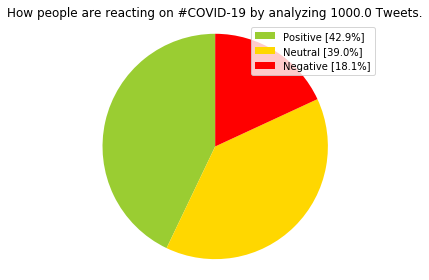

In [65]:
api_key = "zCFloLE29Vd1TMqJxXXaRRriE"
api_secret_key = "BJKox9gxzSnmx0pDvB5DNx835Xx4vL9ssqI4lk68l2O3eKFAtr"
access_token = "345306559-Y1ULoSZxuYffIalfOcePIBx5SgyOAJhBFang80tm"
access_token_secret = "gde5l43aLcWsOYNkm6kNHQtEM3S0Ex7Jtr3Gl5Nnpk8uD"
auth  = tweepy.OAuthHandler(consumer_key = api_key,consumer_secret= api_secret_key)
auth.set_access_token(access_token, access_token_secret)

searchTerm = '#COVID-19'
api = tweepy.API(auth)
#tweets = api.search(searchTerm, until = '2020-04-09', count = 10000, lang = 'en')
tweets = tweepy.Cursor(api.search, q=searchTerm, result_type="recent", lang="en").items(1000)

total_polarity = 0.0
total_tweets = 0.0
positive_sentiments = 0
negative_sentiments = 0
neutral_sentiments = 0

for tweet in tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    total_polarity += analysis.sentiment.polarity
    total_tweets += 1
    if(analysis.sentiment.polarity > 0):
        positive_sentiments += 1
        
    elif(analysis.sentiment.polarity < 0):
        negative_sentiments += 1
    else:
        neutral_sentiments += 1
   
    
print("total_polarity", total_polarity)
print("total_tweets", total_tweets)

labels = ['Positive [' + str(positive_sentiments*100/total_tweets) + '%]', 'Neutral [' + str(neutral_sentiments*100/total_tweets) + '%]','Negative [' + str(negative_sentiments*100/total_tweets) + '%]']
sizes = [positive_sentiments*100/total_tweets, neutral_sentiments*100/total_tweets, negative_sentiments*100/total_tweets]
colors = ['yellowgreen','gold', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(total_tweets) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()
    
    